<div class="alert alert-block alert-warning">
<b>Warning:</b> THIS IS THE MASTER DOCUMENT! DO NOT MAKE UNAGREED CHANGES!!</a>
</div>

***
***
# Table of Contents


[Imports](#imports)

[1. Project Overview](#1-project-overview)

[2. Project Introduction](#2-project-introduction)

[3. Data Description](#3-data-description)

[4. Data Preprocessing](#4-data-preprocessing)

[5. Analysis and Model Training](#5-analysis-and-model-training)

[6. Results](#6-results)

[7. Conclusion and Outlook](#7-conclusion-and-outlook)

[Appendix](#appendix)

***
***
# Imports

In [5]:
import dotenv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import ast
import osmnx as ox

***
# 1. Project Overview

## **Sprottenflotte**

**Authors:**
- Claas Resow - claas.resow@student.fh-kiel.de
- Felix Haack - felix.haack@student.fh-kiel.de
- Justus Heilingbrunner - justus.heilingbrunner@student.fh-kiel.de
- Paul Brodmann - paul.brodmann@student.fh-kiel.de

**Summary:**

A brief description of the project, its objectives and results.

***
# 2. Project Introduction

**Problem statement:**

A detailed description of the problem that your project addresses.

**Objectives and hypotheses:**

Clearly stated objectives and possibly the hypotheses you want to test.

***
# 3. Data Description

- Data sources: Where does the data come from? (e.g. public databases, proprietary data)
    - API


- Data structure: Describe the format of the data (e.g. CSV, JSON) and the key variables.
    - in .csv format
    - Key Variables:
 

**Hub List all time + pick up and drop offs.csv | Features:**

1. **id**: 
2. **name**: 
3. **state**: 
4. **created_at**: 
5. **maximum_capacity**: 
6. **pickups**: 
7. **dropoffs**: 

In [ ]:
df_stations = pd.read_csv('Data/Hub List all time + pick up and drop offs.csv')
print(df_stations.shape)
df_stations.head()

In [ ]:
df_stations['name'].unique()

In [ ]:
print('number of missing values:', df_stations.isnull().sum().sum())
print('number of NaN values:', df_stations.isna().sum().sum())
df_stations.info()

In [ ]:
# look at dataset
print('Shape:', df_stations.shape)
print('Columns:', df_stations.columns)
print('\ndifferent names:', df_stations['name'].nunique())
print('unique states:', df_stations['state'].nunique())
print(df_stations['state'].unique())
print('\nmaximal capacity:', df_stations['maximum_capacity'].max())
print('minimal capacity:', df_stations['maximum_capacity'].min())
print(df_stations['maximum_capacity'].unique())
print('\n')
print(df_stations['maximum_capacity'].value_counts()[:5])

***

**FelixData_final_main_kiel.csv | Features:**

1. **index** - ids
2. **entityId** - ids
3. **entitiyType** - ids
4. **name** - ids
5. **availableBikeNumber** - ids
6. **freeSlotNumber** - ids    
7. **totatlSlotNumber** - ids    
8. **pickups** - ids    
9. **dropoffs** - ids   

In [2]:
df = pd.read_csv('FelixData_final_main_kiel.csv')
print(df.shape)
df.head()

,index,entityId,entityType,name,availableBikeNumber,freeSlotNumber,totalSlotNumber,pickups,dropoffs
0,2024-06-17T11:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.032787,25.000000,30.0,4627,4683
1,2024-06-17T12:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,6.762712,24.237288,30.0,4627,4683
2,2024-06-17T13:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,6.864407,24.000000,30.0,4627,4683
3,2024-06-17T14:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.846154,24.153846,30.0,4627,4683
4,2024-06-17T15:00:00.000+00:00,24367,BikeHireDockingStation,Anleger Dietrichsdorf,5.305556,24.694444,30.0,4627,4683


In [4]:
df.columns

Index(['index', 'entityId', 'entityType', 'name', 'availableBikeNumber',
       'freeSlotNumber', 'totalSlotNumber', 'pickups', 'dropoffs'],
      dtype='object')

In [ ]:
print('number of missing values:', df.isnull().sum().sum())
print('number of NaN values:', df.isna().sum().sum())
df.info()

In [ ]:
# look at dataset
print('Shape:', df.shape)
print('Columns:', df.columns)


- Data exploration: Brief preliminary analysis of the data, including statistics on key variables and possibly initial visualizations.
    - visualisations
        - geo map with bikestations
        

In [6]:
df.describe()

,entityId,availableBikeNumber,freeSlotNumber,totalSlotNumber,pickups,dropoffs
count,86501.000000,86501.000000,86501.000000,86022.000000,86501.000000,86501.000000
mean,24526.825227,4.976350,20.367157,26.131431,10763.219974,10722.754847
std,500.767548,6.808609,10.806578,10.999875,10015.680102,9952.040947
min,24367.000000,0.000000,0.000000,15.000000,694.000000,570.000000
25%,24380.000000,0.423729,14.550000,20.000000,4627.000000,4683.000000
50%,24397.000000,2.000000,19.000000,25.000000,7544.000000,7593.000000
75%,24457.000000,6.615385,26.000000,30.000000,14981.000000,15008.000000
max,26889.000000,63.433333,80.000000,80.000000,57838.000000,57410.000000


In [20]:
geo_data = pd.read_csv('data/response_IDs_KielRegion.csv')
geo_data.head()

,ID,Status,Name,Location
0,30467,0,NaN,NaN
1,30466,0,NaN,NaN
2,30464,1,Pop Up Rathaus event,"[10.132222, 54.322469]"
3,30434,1,Felde Gemeindezentrum,"[9.933817, 54.299552]"
4,30420,0,NaN,NaN


In [21]:
geo_data['Location'][3]

'[9.933817, 54.299552]'

In [22]:
# Geo Data kiel from Open Street Map

tags = {'admin_level': '10'}
geo = ox.features_from_place(
    query="Kiel, Germany",
    tags=tags)
geo = geo.reset_index()
geo = geo[geo.element_type=='relation']
geo.head(3)

,element_type,osmid,source,geometry,name,note,fixme,nodes,wikidata,admin_level,boundary,description,ways,type,name:lt
57,relation,968220,description wikipedia http://de.wikipedia.org/...,"POLYGON ((10.10165 54.34537, 10.10205 54.34551...",Ravensberg,NaN,NaN,"[[[6579922566, 4210616712, 4210616718, 4210616...",Q1301655,10,administrative,NaN,"[95922356, 8033159, 700080203, 37332588, 11226...",boundary,NaN
58,relation,969228,NaN,"POLYGON ((10.13046 54.33575, 10.13097 54.33614...",Blücherplatz,NaN,NaN,"[[[1584227487, 195530776, 6906815974, 83197278...",Q1740941,10,administrative,NaN,"[144949011, 155075900, 997472904, 12519965, 10...",boundary,NaN
59,relation,969563,NaN,"POLYGON ((10.09509 54.3289, 10.09596 54.32939,...",Schreventeich,NaN,NaN,"[[[323631212, 323642031, 324059936, 323398901,...",Q978752,10,administrative,NaN,"[373722897, 373722896, 62247422, 911887650, 53...",boundary,NaN


In [23]:
geo = geo[['name','geometry']]
geo.head(3)

,name,geometry
57,Ravensberg,"POLYGON ((10.10165 54.34537, 10.10205 54.34551..."
58,Blücherplatz,"POLYGON ((10.13046 54.33575, 10.13097 54.33614..."
59,Schreventeich,"POLYGON ((10.09509 54.3289, 10.09596 54.32939,..."


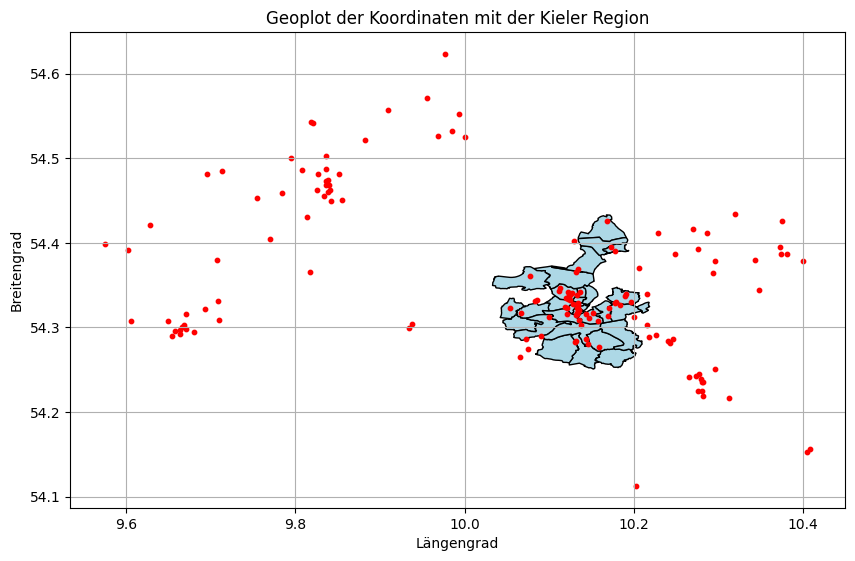

In [79]:
# Beispielkoordinaten
# coordinates_list = [(10.122253, 54.341647), (10.3, 54.5), (10.5, 54.4)]  # Füge hier deine Koordinaten ein

def extract_coordinates(location):
    """ Annahme: 'location' enthält Tupel aus (Längengrad, Breitengrad) """
    # return Point(location_str)
    try:
        # Konvertiere den String in eine Liste von Koordinaten
        if isinstance(location, str):
            location = ast.literal_eval(location)
        # Erstelle Point, nur wenn es eine valide Liste von zwei Koordinaten ist
        if isinstance(location, list) and len(location) == 2:
            return Point(location[0], location[1])
    except (ValueError, SyntaxError):
        pass
    return None

# Erstelle eine GeoSeries aus den Koordinaten, indem du für jede Koordinate einen Point erstellst
geometry = geo_data['Location'].apply(extract_coordinates)

# Erstelle ein GeoDataFrame mit der Spalte 'geometry'
gdf_points = gpd.GeoDataFrame(geometry=geometry)

gdf_region = geo # geo

#########
# Plotte die Karte
fig, ax = plt.subplots(figsize=(10, 10))

# Zeichne die Region
gdf_region.plot(ax=ax, color='lightblue', edgecolor='black')

# Zeichne die Punkte
gdf_points.plot(ax=ax, marker='o', color='red', markersize=10)

plt.title('Geoplot der Koordinaten mit der Kieler Region')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.grid(True)

# Zeige die Karte
plt.show()

In [17]:
geometry

0                             None
1                             None
2      POINT (10.132222 54.322469)
3       POINT (9.933817 54.299552)
4                             None
                  ...             
228                           None
229                           None
230                           None
231    POINT (10.131167 54.314861)
232    POINT (10.178556 54.329611)
Name: Location, Length: 233, dtype: object

***
# 4. Data Preprocessing

- Data cleaning
- Transformations
- Feature engineering

***
# 5. Analysis and Model Training

- Exploratory data analysis (EDA): More detailed analyses and visualizations to gain insights.

- Model selection and justification: Which models were tried and why? (e.g. linear regression, decision trees, neural networks)

- Training process: details on how the models were trained, including hyperparameter settings, cross-validation, etc.

- Evaluation and comparison: Metrics for model evaluation and a comparison of the different models.

***
# 6. Results

- Final results: Presentation of the best models and their performance.

- Visualizations: Diagrams and plots that clearly illustrate the results.

- Interpretation of the results: Analysis and interpretation of key findings.

***
# 7. Conclusion and Outlook

- Summary of the results: Brief summary of the most important results and findings.

- Limitations of the project: Mention of possible limitations and challenges.

- Future work: Suggestions for future improvements or further research.

[to Table of Contents](#table-of-contents)

***
# Appendix

- Code snippets: Important but too long code snippets that would unnecessarily bloat the main document.

- Additional data: Further exploratory analysis or test runs.

- Sources and references: Cite any paper, book, or online resources used.